In [ ]:
# Reload imports to ensure all changes in libraries are considered
%reload_ext autoreload
%autoreload 2



In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,  KFold
from lib.full_flow_dataloader import load_full_flow_data
import matplotlib.pyplot as plt
# Use for report, but can't copy-paste, so disabling
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import seaborn as sns


In [ ]:
# def custom_kfold_cross_validation_extreme(data, n_splits: int, target: str, group_by: str, extreme_percentage: float, random_state=None):

train_processed, test_processed = load_full_flow_data()
data = pd.concat([train_processed, test_processed])
target = 'MgO'
group_by = 'Sample Name'
extreme_percentage = 0.05
n_splits = 5
random_state = 42

In [ ]:
from lib.cross_validation import custom_kfold_cross_validation_new

# folds_custom = stratified_group_kfold_split(
#     data, group_by=group_by, target=target, num_bins=5, n_splits=5, random_state=42
# )

folds_custom, train_full, test_full = custom_kfold_cross_validation_new(
    data=data, k=5, group_by=group_by, target=target, random_state=42
)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_data(data, group_by, target, title):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[target], bins=30, kde=True)
    plt.title(f"{title}: Distribution of {target}")

    plt.subplot(1, 2, 2)
    sns.boxplot(data[target])
    plt.title(f"{title}: Boxplot of {target}")

    plt.show()


def visualize_folds(data, group_by, target, title):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x="fold", y=target, data=data)
    plt.title(f"{title}: Boxplot of {target} by Fold")

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=target, hue="fold", multiple="stack", palette="Set1")
    plt.title(f"{title}: Histogram of {target} by Fold")

    plt.show()


def visualize_train_test_split(train_data, test_data, group_by, target):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x="fold", y=target, data=train_data)
    plt.title(f"Train Data: Boxplot of {target} by Fold")

    plt.subplot(1, 2, 2)
    sns.boxplot(x="fold", y=target, data=test_data)
    plt.title(f"Test Data: Boxplot of {target} by Fold")

    plt.show()

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data=train_data, x=target, hue="fold", multiple="stack", palette="Set1")
    plt.title(f"Train Data: Histogram of {target} by Fold")

    plt.subplot(1, 2, 2)
    sns.histplot(data=test_data, x=target, hue="fold", multiple="stack", palette="Set1")
    plt.title(f"Test Data: Histogram of {target} by Fold")

    plt.show()


# Assuming you have a data DataFrame
group_by = "Sample Name"
target = "SiO2"

# Running custom k-fold cross-validation
folds_custom, train_full, test_full = custom_kfold_cross_validation_new(
    data=data, k=5, group_by=group_by, target=target, random_state=42, remove_fold_column=False
)

# Concatenate train and test data for visualizing the full dataset with folds
full_data_with_folds = pd.concat([train_full, test_full], ignore_index=True)

# Visualize original data
visualize_data(data, group_by, target, "Original Data")

# Visualize data after assigning folds
visualize_folds(full_data_with_folds, group_by, target, "Data with Folds Assigned")

# Visualize train and test split after assigning folds
visualize_train_test_split(train_full, test_full, group_by, target)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_combined(data, full_data_with_folds, group_by, target):
    # Define the bin edges based on the original data
    bin_edges = np.histogram_bin_edges(data[target], bins=30)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[target], bins=bin_edges, kde=True)
    plt.title(f"Original Data: Distribution of {target}")

    plt.subplot(1, 2, 2)
    hist_plot = sns.histplot(
        data=full_data_with_folds, x=target, hue="fold", bins=bin_edges, multiple="stack", palette="Set1"
    )
    plt.title(f"Data with Folds Assigned: Histogram of {target} by Fold")

    # Update legend labels
    new_labels = ["Fold 0 (Train)", "Fold 1 (Train)", "Fold 2 (Train)", "Fold 3 (Train)", "Fold 4 (Test)"]
    for t, l in zip(hist_plot.legend_.texts, new_labels):
        t.set_text(l)

    plt.tight_layout()
    plt.show()


# Assuming you have a data DataFrame
group_by = "Sample Name"
target = "SiO2"

# Running custom k-fold cross-validation
folds_custom, train_full, test_full = custom_kfold_cross_validation_new(
    data=data, k=5, group_by=group_by, target=target, random_state=42, remove_fold_column=False
)

# Concatenate train and test data for visualizing the full dataset with folds
full_data_with_folds = pd.concat([train_full, test_full], ignore_index=True)

# Visualize original data and data with folds assigned
visualize_combined(data, full_data_with_folds, group_by, target)

Standard Deviation and Mean of the target variable in each fold:
         Fold  Standard Deviation       Mean
0           1           16.281662  55.695652
1           2           12.460491  57.590993
2           3           18.005494  51.512382
3           4           15.771442  55.101601
4  Train Full           15.914993  54.961635
5   Test Full            9.063287  56.569381
6        Full           14.935582  55.248495


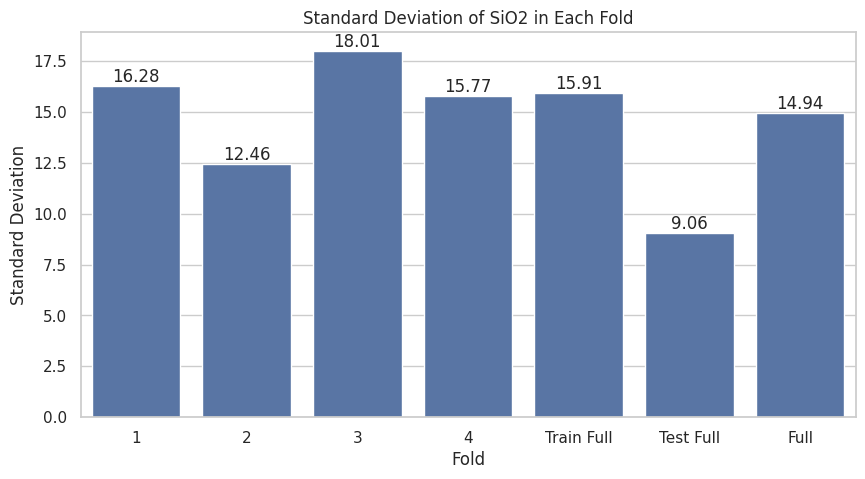

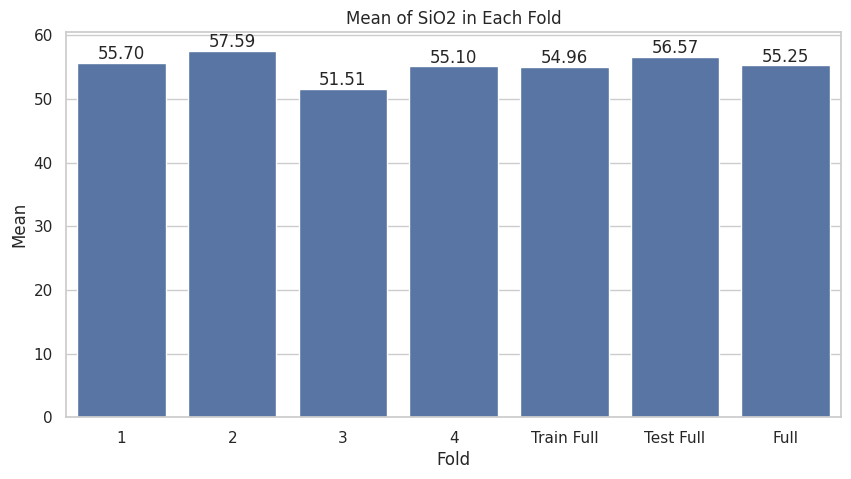

In [81]:
# Calculation of the standard deviation and mean of the target variable within each fold
statistics = []

folds_custom, train_full, test_full = custom_kfold_cross_validation_new(
    data=data, k=5, group_by=group_by, target=target, random_state=42, remove_fold_column=False
)

for index, (train_set, test_set) in enumerate(folds_custom):
    target_values = test_set[target]
    standard_deviation = target_values.std()
    mean_value = target_values.mean()
    statistics.append((index + 1, standard_deviation, mean_value))

train_full_standard_deviation = train_full[target].std()
train_full_mean = train_full[target].mean()
statistics.append(('Train Full', train_full_standard_deviation, train_full_mean))

# Calculate the standard deviation and mean for the test_full set
test_full_standard_deviation = test_full[target].std()
test_full_mean = test_full[target].mean()
statistics.append(('Test Full', test_full_standard_deviation, test_full_mean))

full_dataset = pd.concat([train_full, test_full], ignore_index=True)
full_standard_deviation = full_dataset[target].std()
full_mean = full_dataset[target].mean()
statistics.append(('Full', full_standard_deviation, full_mean))

# Creation of a DataFrame to store the standard deviations and means
statistics_df = pd.DataFrame(statistics, columns=['Fold', 'Standard Deviation', 'Mean'])

# Display the standard deviations and means
print("Standard Deviation and Mean of the target variable in each fold:")
print(statistics_df)

# Visualization of the standard deviations and means using seaborn
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Plot for standard deviations
bar_plot_std = sns.barplot(x='Fold', y='Standard Deviation', data=statistics_df)
bar_plot_std.set_title(f'Standard Deviation of {target} in Each Fold')
bar_plot_std.set_xlabel('Fold')
bar_plot_std.set_ylabel('Standard Deviation')
for container in bar_plot_std.containers:
    bar_plot_std.bar_label(container, fmt='%.2f')
plt.savefig('std_deviation_plot.svg')
plt.show()

# Plot for means
plt.figure(figsize=(10, 5))
bar_plot_mean = sns.barplot(x='Fold', y='Mean', data=statistics_df)
bar_plot_mean.set_title(f'Mean of {target} in Each Fold')
bar_plot_mean.set_xlabel('Fold')
bar_plot_mean.set_ylabel('Mean')
for container in bar_plot_mean.containers:
    bar_plot_mean.bar_label(container, fmt='%.2f')
plt.savefig('mean_plot.svg')
plt.show()

In [ ]:

# == DISTRIBUTION PLOT ==
# Prepare data for plotting
fold_data_custom = []

for i, (_, test) in enumerate(folds_custom):
    fold_target = test[target]
    for value in fold_target:
        fold_data_custom.append((i+1, value))

# Add test_full data
test_full_target = test_full[target]
for value in test_full_target:
    fold_data_custom.append(('Test Full', value))

fold_df_custom = pd.DataFrame(fold_data_custom, columns=['Fold', target])

# Plot the distribution of SiO2 in each fold
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fold', y=target, data=fold_df_custom)
plt.title(f'Custom Stratified Group K-Fold: Distribution of {target} in Each Fold')
plt.xlabel('Fold')
plt.ylabel(target)
plt.show()

# == HISTOGRAM PLOT ==
# Plot the histogram and KDE for each fold
plt.figure(figsize=(15, 10))

for i, (train_full, test) in enumerate(folds_custom):
    fold_target = test[target]
    sns.histplot(fold_target, kde=True, bins=30, label=f'Fold {i+1} ({len(train_full)} / {len(test)})', alpha=0.5)

# Add test_full data
sns.histplot(test_full_target, kde=True, bins=30, label=f'Test Full ({len(test_full)})', alpha=0.5, color='black')

plt.title(f'Custom Stratified Group K-Fold: Histogram and KDE of {target} Distribution in Each Fold')
plt.xlabel(target)
plt.ylabel('Count')
plt.legend()
plt.show()

# == HISTOGRAM PLOT ==
# Plot the histograms for each fold in a grid layout
num_folds = len(folds_custom)
num_cols = 3
num_rows = (num_folds + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, (train_full, test) in enumerate(folds_custom):
    fold_target = test[target]
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(fold_target, kde=True, bins=30, label=f'Fold {i+1} ({len(train_full)} / {len(test)})', alpha=0.5)
    plt.title(f'Fold {i+1}')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.legend()

# Add test_full data in a separate subplot
plt.subplot(num_rows, num_cols, num_folds + 1)
sns.histplot(test_full_target, kde=True, bins=30, label=f'Test Full ({len(test_full)})', alpha=0.5, color='black')
plt.title('Test Full')
plt.xlabel(target)
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plot the histogram and KDE for each fold as separate plots in a grid with 2 rows
n_folds = len(folds)
n_cols = (n_folds + 1) // 2  # Calculate the number of columns needed

fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15, 10))

# Determine the global min and max for x and y values
all_fold_targets = pd.concat([y.iloc[test_index] for _, test_index in folds])
x_min, x_max = all_fold_targets.min(), all_fold_targets.max()
# y_min, y_max = 0, max([sns.histplot(y.iloc[test_index], kde=True, bins=30).get_lines()[0].get_data()[1].max() for _, test_index in folds])

for i, (train_full, test_full) in enumerate(folds):
    row = i // n_cols
    col = i % n_cols
    fold_target = y.iloc[test_full]
    sns.histplot(fold_target, kde=True, bins=30, ax=axes[row, col], label=f'Fold {i+1} ({len(fold_target)})', alpha=0.5)
    axes[row, col].set_title(f'Fold {i+1} - Histogram and KDE of SiO2 Distribution')
    axes[row, col].set_xlabel('SiO2')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_xlim(x_min, x_max)
    # axes[row, col].set_ylim(y_min, y_max)
    axes[row, col].legend()

# Remove any empty subplots
if n_folds % 2 != 0:
    fig.delaxes(axes[1, n_cols - 1])

plt.tight_layout()
plt.show()


In [ ]:
tar_and_group_df = pd.concat([data[target], data[group_by]], axis=1)
tar_and_group_df

In [ ]:
tar_and_group_df = tar_and_group_df.drop_duplicates().reset_index(drop=True)
tar_and_group_df



In [ ]:
sns.histplot(data=tar_and_group_df, x=target, kde=True)
plt.title(f"Distribution of {target} before binning")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

def assign_bins(data, target, n_bins, strategy='quantile'):
    """
    Assigns data into bins using KBinsDiscretizer and sets the bins as discrete values.

    Parameters:
    data (pd.DataFrame): The input data.
    target (str): The target column to be binned.
    n_bins (int): The number of bins to create.
    strategy (str): The strategy used to define the widths of the bins. Default is 'quantile'.

    Returns:
    pd.DataFrame: DataFrame with an additional column 'bins' containing the bin assignments.
    """
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    data['bins'] = discretizer.fit_transform(data[[target]]).astype(int)
    return data

# Example usage:
# data = pd.DataFrame({'SiO2': [56.13, 57.60, 64.80, 77.94, 70.73, 44.13, 54.58, 67.82, 40.28, 40.79]})
# binned_data = assign_bins(data, target='SiO2', n_bins=5)
# print(binned_data)

In [ ]:
out = assign_bins(data=tar_and_group_df.copy(), target=target, n_bins=n_splits, strategy='quantile')



In [ ]:
out['bins'].unique()

In [ ]:
out

In [ ]:
for bin_value in out['bins'].unique():
    sns.histplot(data=out[out['bins'] == bin_value], x=target, kde=True)
    plt.title(f"Distribution of {target} in Bin {bin_value}")
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_bins = len(out['bins'].unique())

fig, axes = plt.subplots(num_bins, 1, figsize=(10, 5 * num_bins), sharex=True)
x = out['bins'].unique()
x.sort()

for i, bin_value in enumerate(x):
    ax = axes[i]
    sns.histplot(x=target, data=out[out['bins'] == bin_value], kde=True, ax=ax)
    ax.set_title(f"Distribution of {target} in Bin {bin_value}")
    ax.set_xlabel(target)
    ax.set_ylabel("Number of Samples")

plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# import numpy as np

# # Initialize the StratifiedKFold object
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# # Create a new column 'fold' in tar_and_group_df to store the fold assignment
# tar_and_group_df['fold'] = -1

# # Assign each sample to a fold
# for fold_number, (train_index, test_index) in enumerate(skf.split(tar_and_group_df, target_discretized)):
#     tar_and_group_df.loc[tar_and_group_df.index[test_index], 'fold'] = fold_number

# tar_and_group_df['fold'].value_counts()




In [ ]:
# # Create bins by unique items as determined by the group_by specification
# unique_groups = data[group_by].unique()
# folds_df = pd.qcut(range(len(unique_groups)), q=n_splits, labels=False)
# folds_df = pd.DataFrame({group_by: unique_groups, 'fold': folds_df})
# folds_df = pd.merge(data, folds_df, on=group_by, how='left')

# folds_df

In [ ]:
# Assert that all samples with the same name also have the same value in 'fold'
# assert all(folds_df.groupby(group_by)['fold'].nunique() == 1), "Samples with the same name have different fold values"


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# unique_folds = folds_df['fold'].unique()
# num_bins = len(unique_folds)

# fig, axes = plt.subplots(num_bins, 1, figsize=(20, 5 * num_bins), sharex=True)

# for i, bin_value in enumerate(unique_folds):
#     ax = axes[i]
#     sns.histplot(x=target, data=folds_df[folds_df['fold'] == bin_value], kde=True, ax=ax)
#     ax.set_title(f"Distribution of {target} in Fold {bin_value}")
#     ax.set_xlabel(target)
#     ax.set_ylabel("Number of Samples")

# plt.tight_layout()
# plt.show()

In [ ]:
import numpy as np

"""
- Target rows, group_by column, extreme_percentage, n_splits, random_state
- Create bins by unique items as determined by the group_by specification
- Assert that all samples with the same name also have the same value in 'fold'
- Create a list of tuples, where each tuple contains the train and test sets for a fold
- Return the list of tuples
"""

# not: [1,2,3,4,5]
# yield (4/5, 1/5) five times
# 1 2 3 4 5
# ^________
# 1 2 3 4 5
# __^______


# def foo():
#     extreme_indices = folds_df[(folds_df[target] > folds_df[target].quantile(1 - extreme_percentage)) | (folds_df[target] < folds_df[target].quantile(extreme_percentage))].index
#     non_extreme_df = folds_df.drop(extreme_indices)
#     kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
#     for i, (train_index, test_index) in enumerate(kf.split(non_extreme_df, non_extreme_df['fold'], groups=folds_df['Sample Name'])):
#         extreme_part = np.array_split(extreme_indices, n_splits)
#         train_index = np.concatenate([non_extreme_df.index[train_index], extreme_part[i]])

#         train, test = folds_df.loc[train_index], folds_df.loc[non_extreme_df.index[test_index]]
#         yield train, test

# train_test_splits = list(foo())
# len(train_test_splits)


In [ ]:
# train, test = train_test_splits[0]
# print(train.shape, test.shape)

# train["Sample Name"].value_counts()
# test["Sample Name"].value_counts()

# # Check for intersection between Sample Name columns in train and test sets
# train_sample_names = set(train["Sample Name"])
# test_sample_names = set(test["Sample Name"])

# intersection = train_sample_names.intersection(test_sample_names)

# if intersection:
#     print(f"Intersection found: {intersection}")
# else:
#     print("No intersection found between Sample Name columns in train and test sets.")
